## Import

In [239]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [240]:
data = pd.read_csv("salesdaily.csv")
data

datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  \
0      1/2/2014   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014   
1      1/3/2014   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2      1/4/2014   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3      1/5/2014   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4      1/6/2014   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101  10/4/2019   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102  10/5/2019   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103  10/6/2019   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104  10/7/2019   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105  10/8/2019   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  
0         1   248     Thursday  
1         1   276       Friday  
2         1   276     Saturday  
3         1   276       Sunday  
4         1   276       Monday  
...     ...   ...          ...  
2101     10   276       Friday  
2102     10   276     Saturday  
2103     10   276       Sunday  
2104     10   276       Monday  
2105     10   190      Tuesday  

[2106 rows x 13 columns]

In [241]:
data1 = pd.read_csv("salesweekly.csv")

In [242]:
data['datum'] = pd.to_datetime(data['datum'], infer_datetime_format=True)
data["Day"] = data["datum"].dt.day

In [243]:
data.index = data.pop('datum')
data

M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  Month  \
datum                                                                          
2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014      1   
2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014      1   
2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014      1   
2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014      1   
2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014      1   
...           ...     ...    ...    ...   ...   ...   ...   ...   ...    ...   
2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019     10   
2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019     10   
2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019     10   
2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019     10   
2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019     10   

            Hour Weekday Name  Day  
datum                               
2014-01-02   248     Thursday    2  
2014-01-03   276       Friday    3  
2014-01-04   276     Saturday    4  
2014-01-05   276       Sunday    5  
2014-01-06   276       Monday    6  
...          ...          ...  ...  
2019-10-04   276       Friday    4  
2019-10-05   276     Saturday    5  
2019-10-06   276       Sunday    6  
2019-10-07   276       Monday    7  
2019-10-08   190      Tuesday    8  

[2106 rows x 13 columns]

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
 12  Day           2106 non-null   int32  
dtypes: float64(8), int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [245]:
data.describe()

M01AB        M01AE        N02BA        N02BE         N05B  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      5.033683     3.895830     3.880441    29.917095     8.853627   
std       2.737579     2.133337     2.384010    15.590966     5.605605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.340000     2.000000    19.000000     5.000000   
50%       4.990000     3.670000     3.500000    26.900000     8.000000   
75%       6.670000     5.138000     5.200000    38.300000    12.000000   
max      17.340000    14.463000    16.000000   161.000000    54.833333   

              N05C          R03          R06         Year        Month  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      0.593522     5.512262     2.900198  2016.401235     6.344255   
std       1.092988     6.428736     2.415816     1.665060     3.386954   
min       0.000000     0.000000     0.000000  2014.000000     1.000000   
25%       0.000000     1.000000     1.000000  2015.000000     3.000000   
50%       0.000000     4.000000     2.000000  2016.000000     6.000000   
75%       1.000000     8.000000     4.000000  2018.000000     9.000000   
max       9.000000    45.000000    15.000000  2019.000000    12.000000   

              Hour          Day  
count  2106.000000  2106.000000  
mean    275.945869    15.686135  
std       1.970547     8.806215  
min     190.000000     1.000000  
25%     276.000000     8.000000  
50%     276.000000    16.000000  
75%     276.000000    23.000000  
max     276.000000    31.000000

In [246]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
Day             0
dtype: int64


In [247]:
data.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Hour', 'Weekday Name', 'Day'],
      dtype='object')

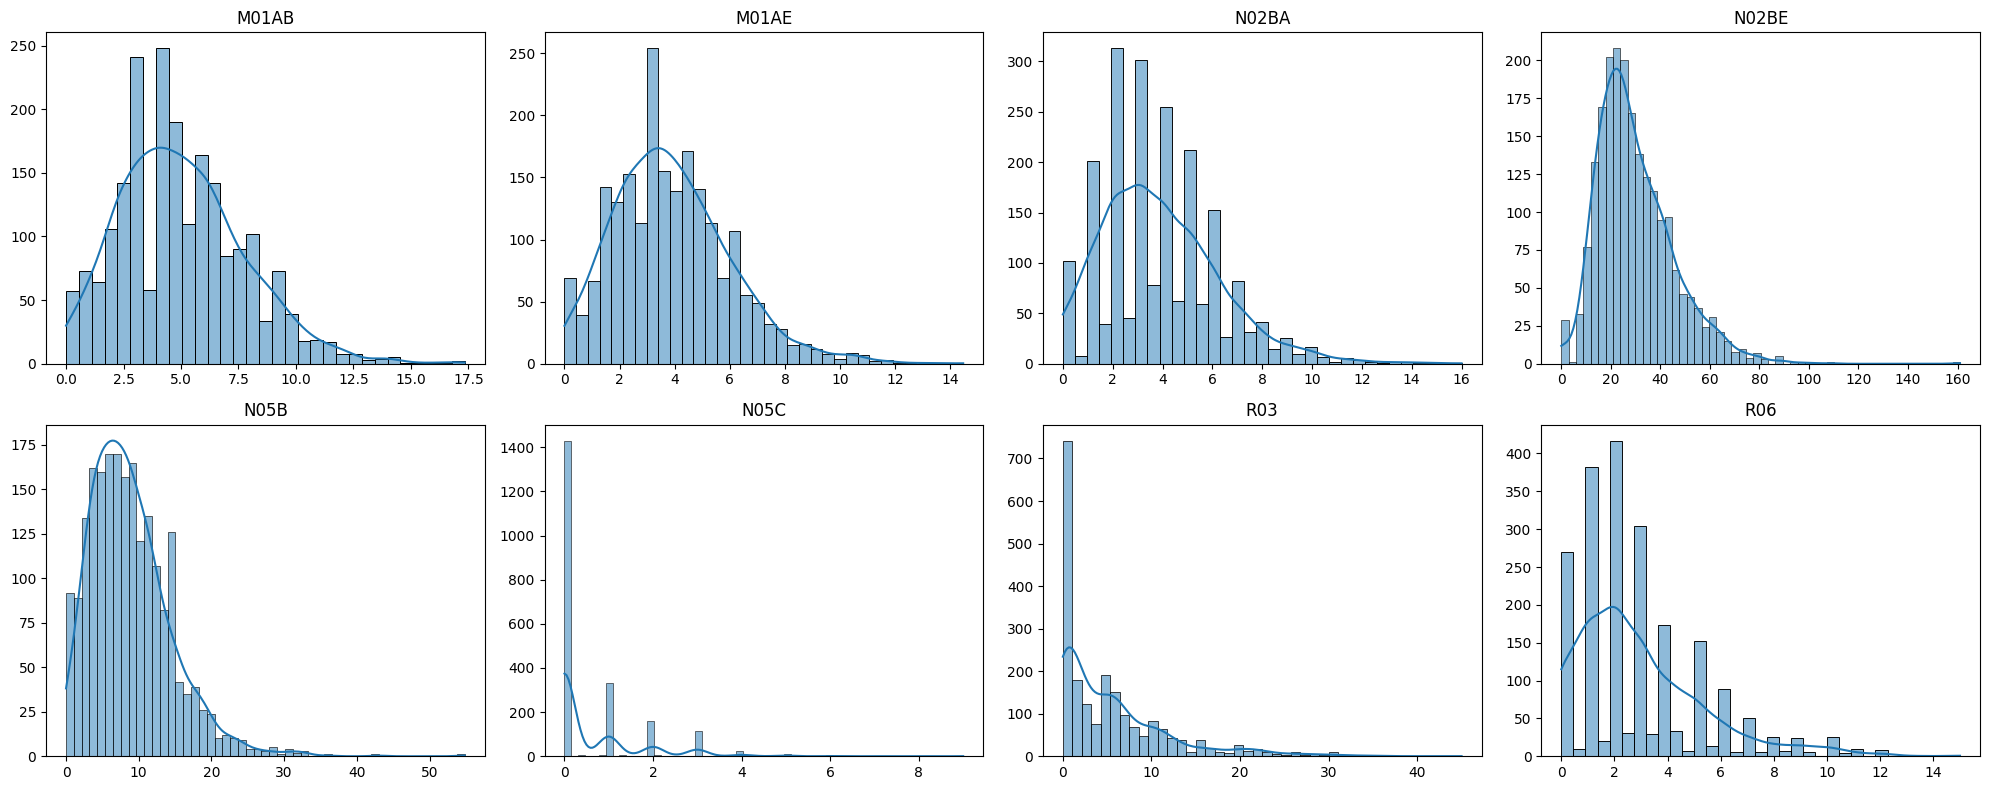

In [248]:
columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03','R06']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

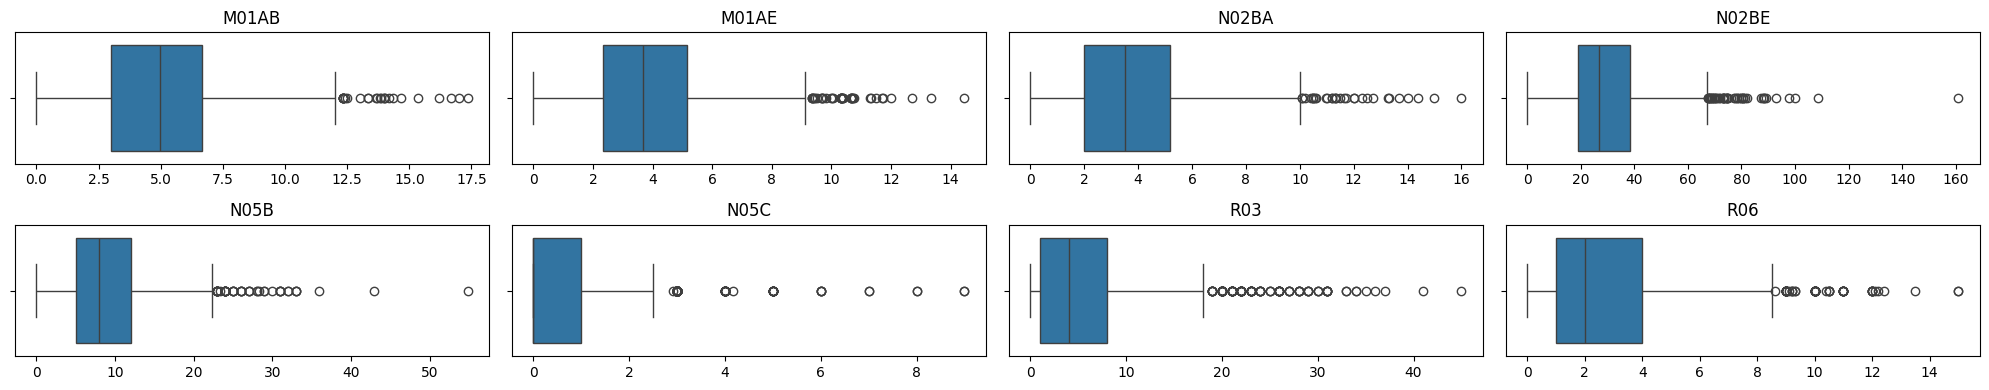

In [249]:
fig, axes = plt.subplots(2, 4, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [250]:
def plot(data, columns, x):
    fig, axes = plt.subplots(4, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

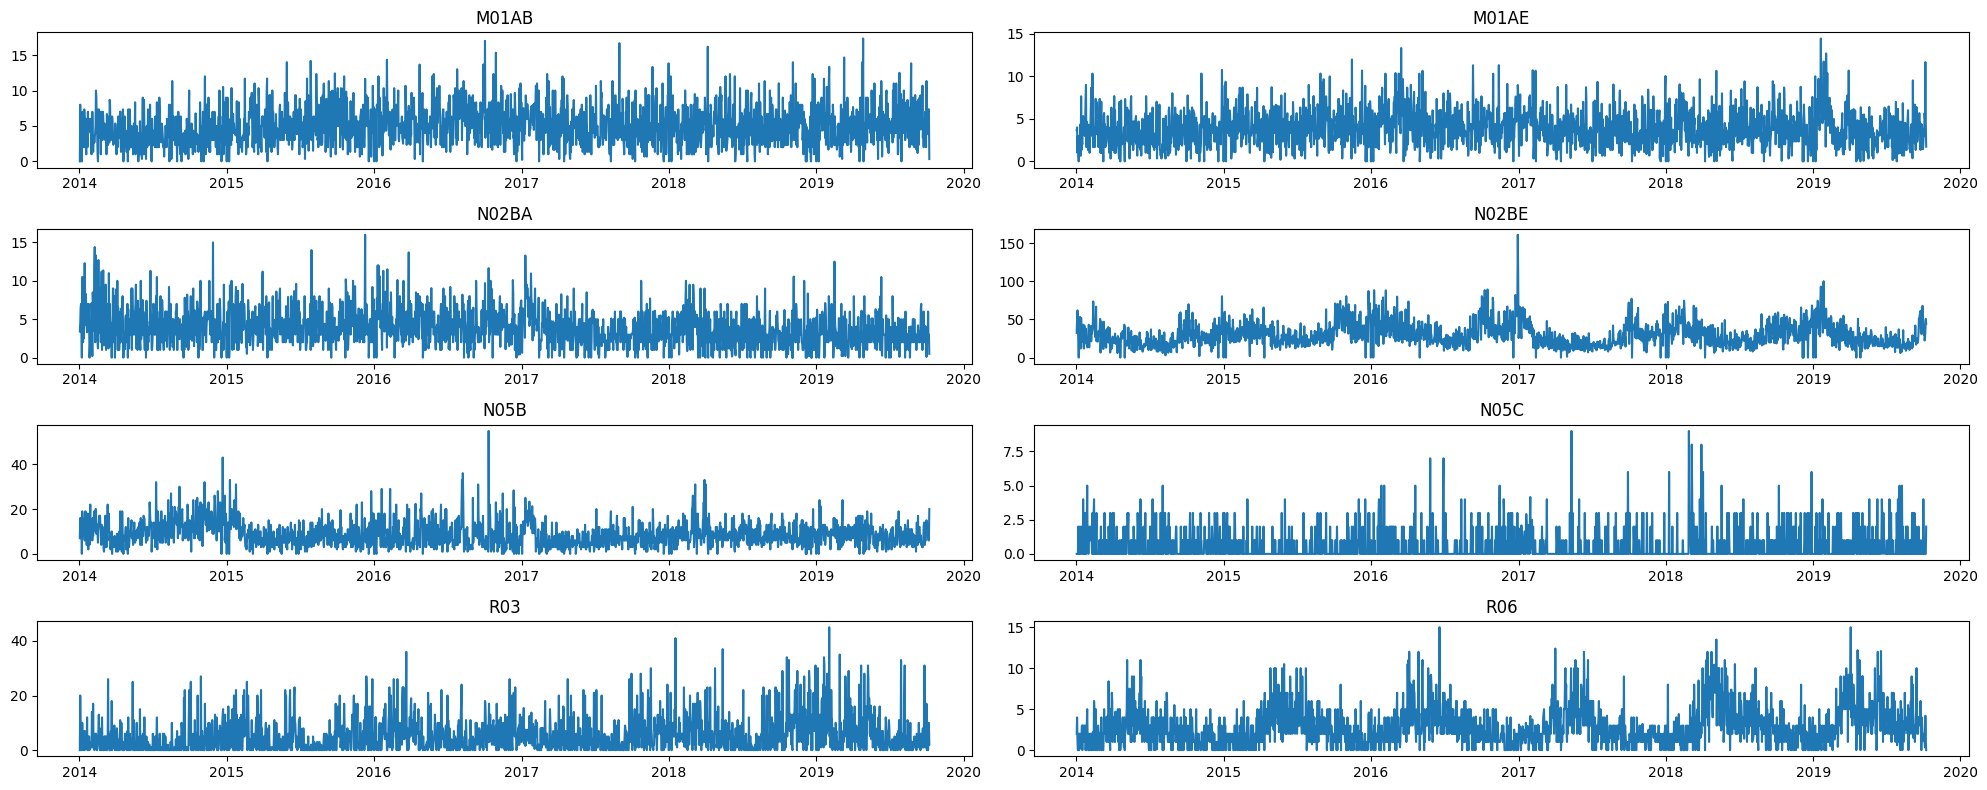

In [251]:
plot(data, columns, 'datum')

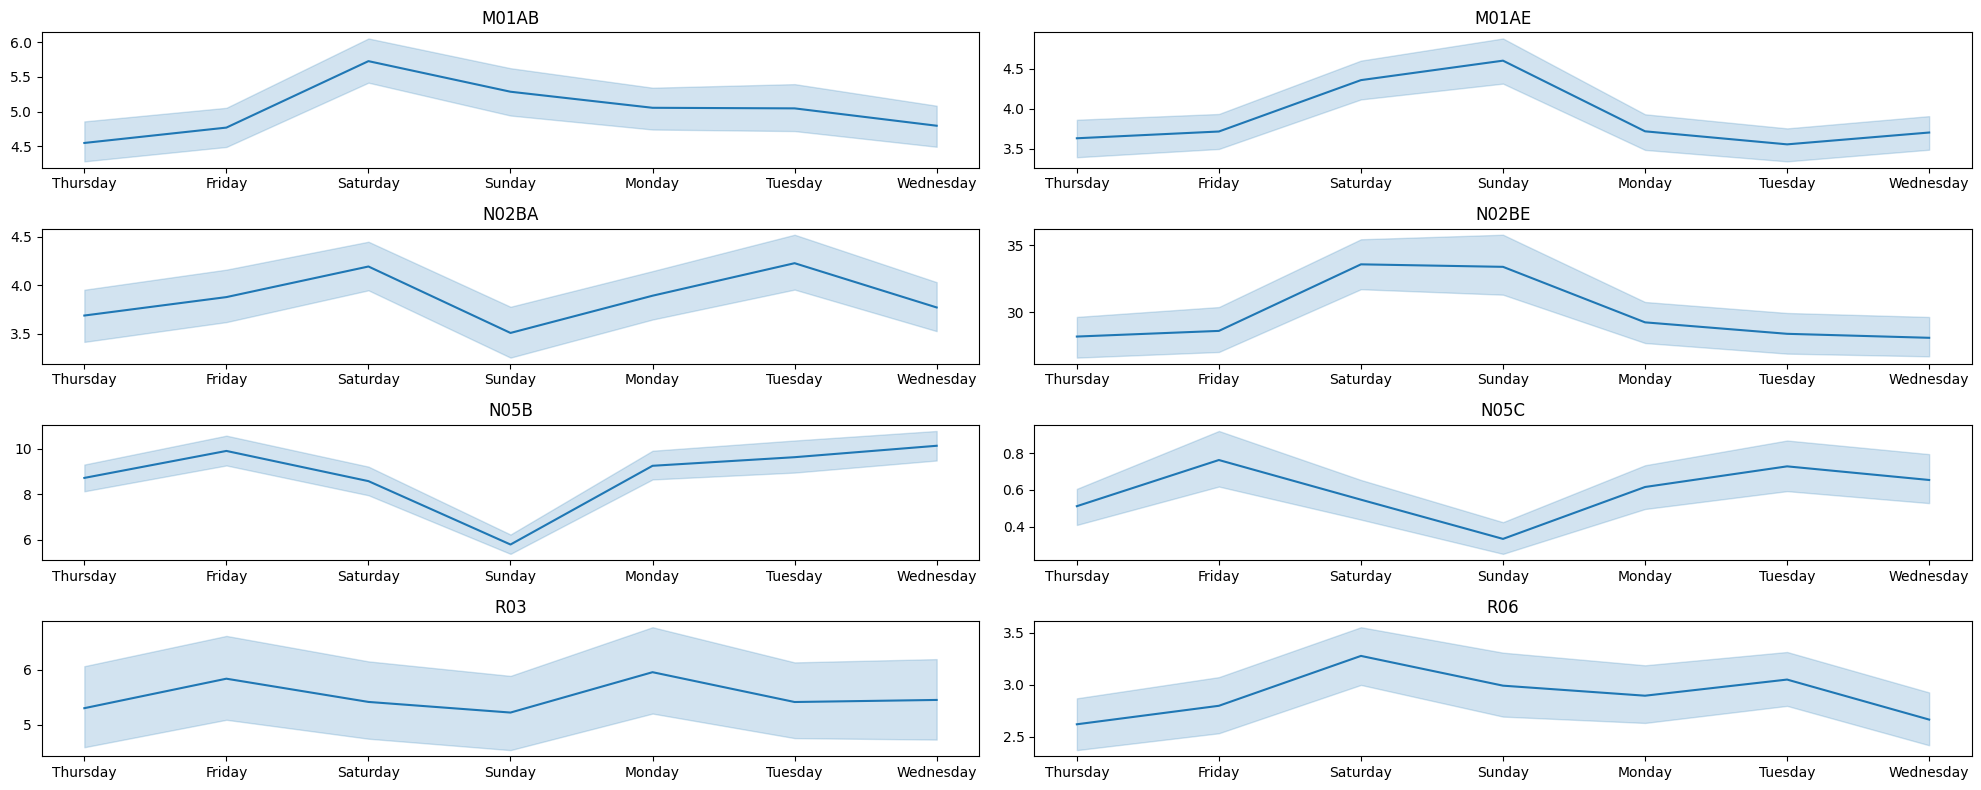

In [252]:
plot(data, columns, 'Weekday Name')

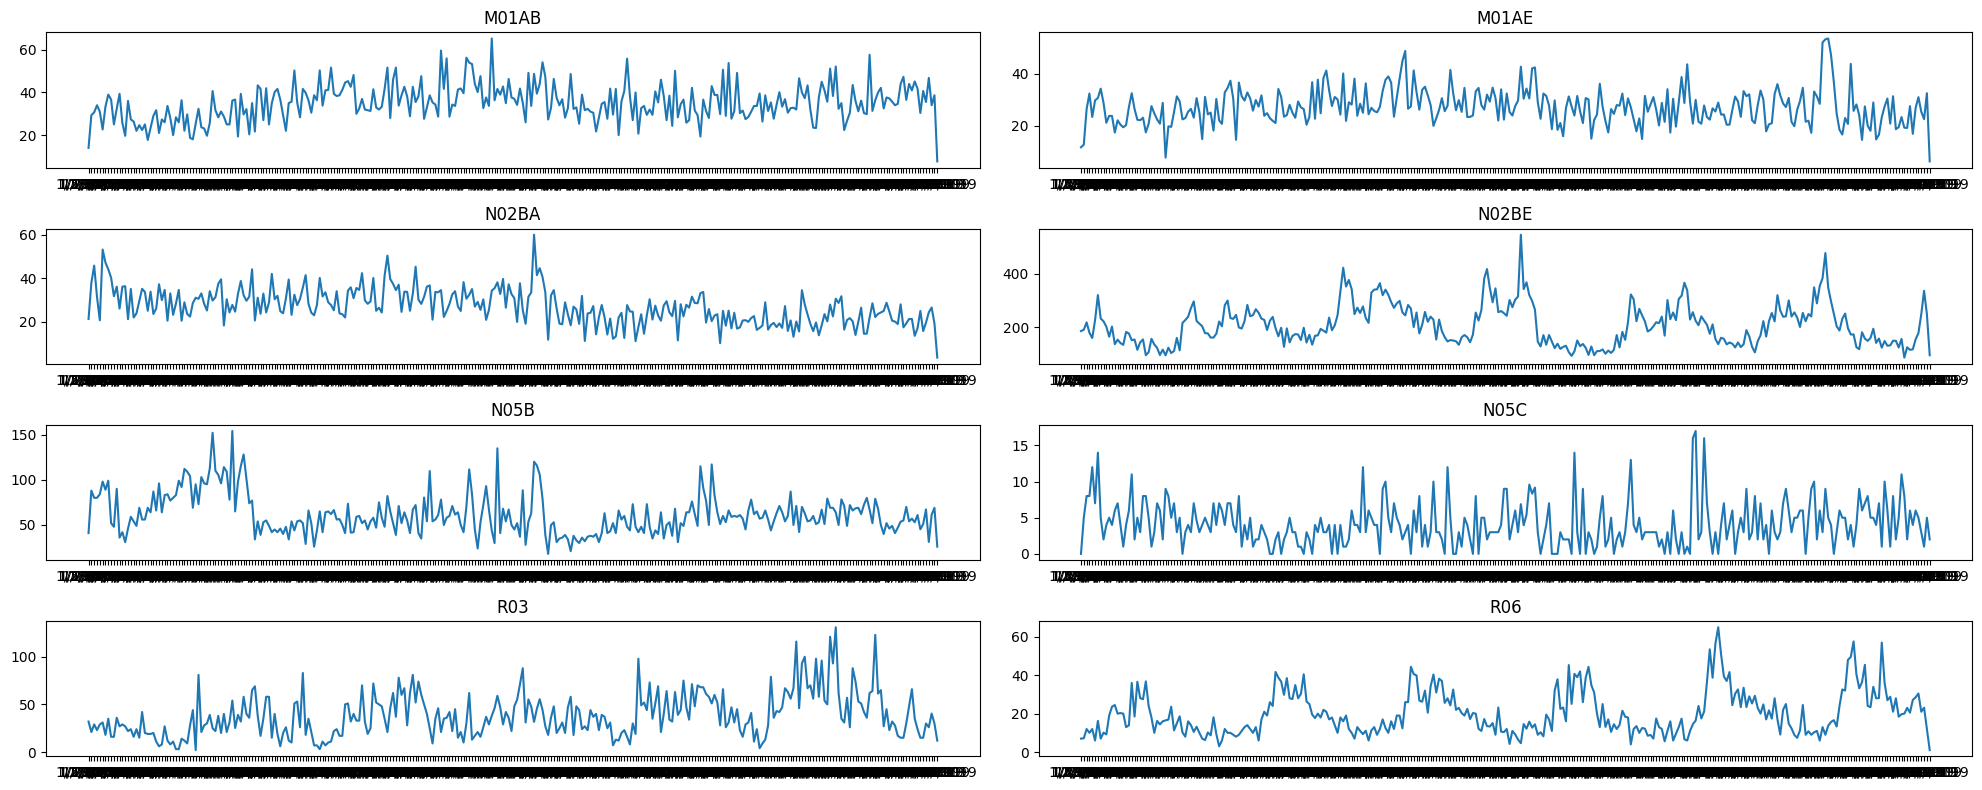

In [253]:
plot(data1, columns, 'datum')

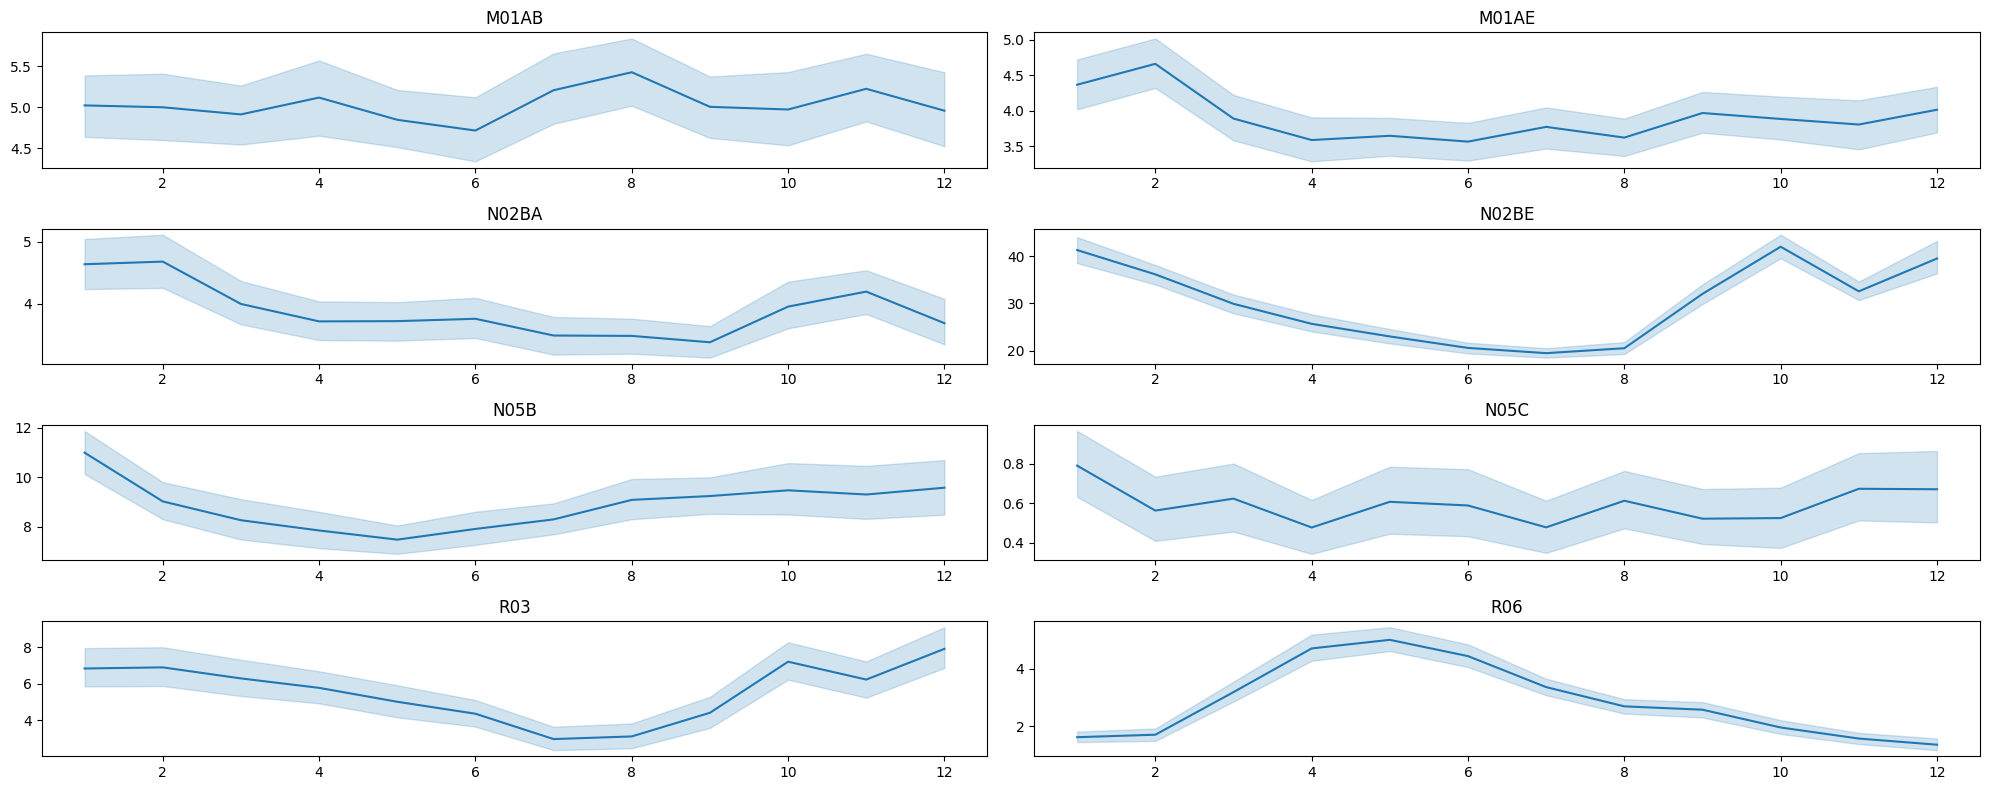

In [254]:
plot(data, columns, 'Month')

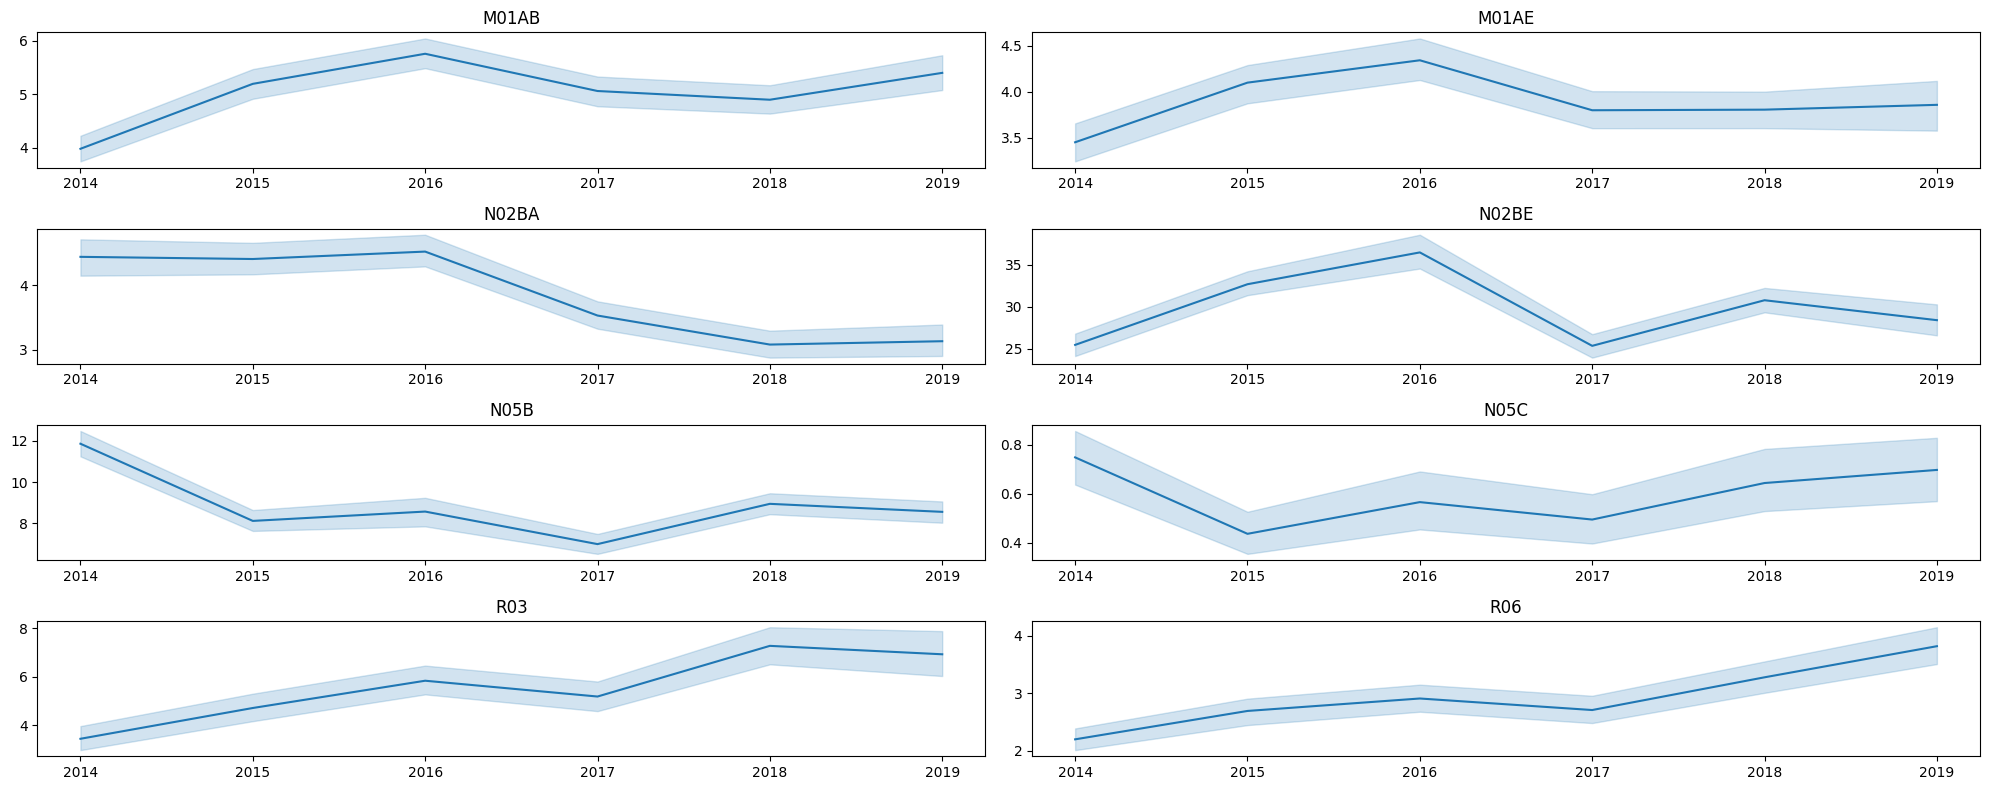

In [255]:
plot(data, columns, 'Year')

In [256]:
data['Weekday Name'].value_counts()

Weekday Name
Thursday     301
Friday       301
Saturday     301
Sunday       301
Monday       301
Tuesday      301
Wednesday    300
Name: count, dtype: int64

In [257]:
scale_mapper = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
    }

data['Weekday Name'] = data['Weekday Name'].replace(scale_mapper)


In [258]:
data["Season"] =    np.where(data["Month"].isin([3,4,5]),"Spring",
                    np.where(data["Month"].isin([6,7,8]), "Summer",
                    np.where(data["Month"].isin ([9,10,11]),"Fall",
                    np.where(data["Month"].isin ([12,1,2]),"Winter","None"))))

In [259]:
data.head()

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
datum                                                                        
2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

            Hour  Weekday Name  Day  Season  
datum                                        
2014-01-02   248             3    2  Winter  
2014-01-03   276             4    3  Winter  
2014-01-04   276             5    4  Winter  
2014-01-05   276             6    5  Winter  
2014-01-06   276             0    6  Winter

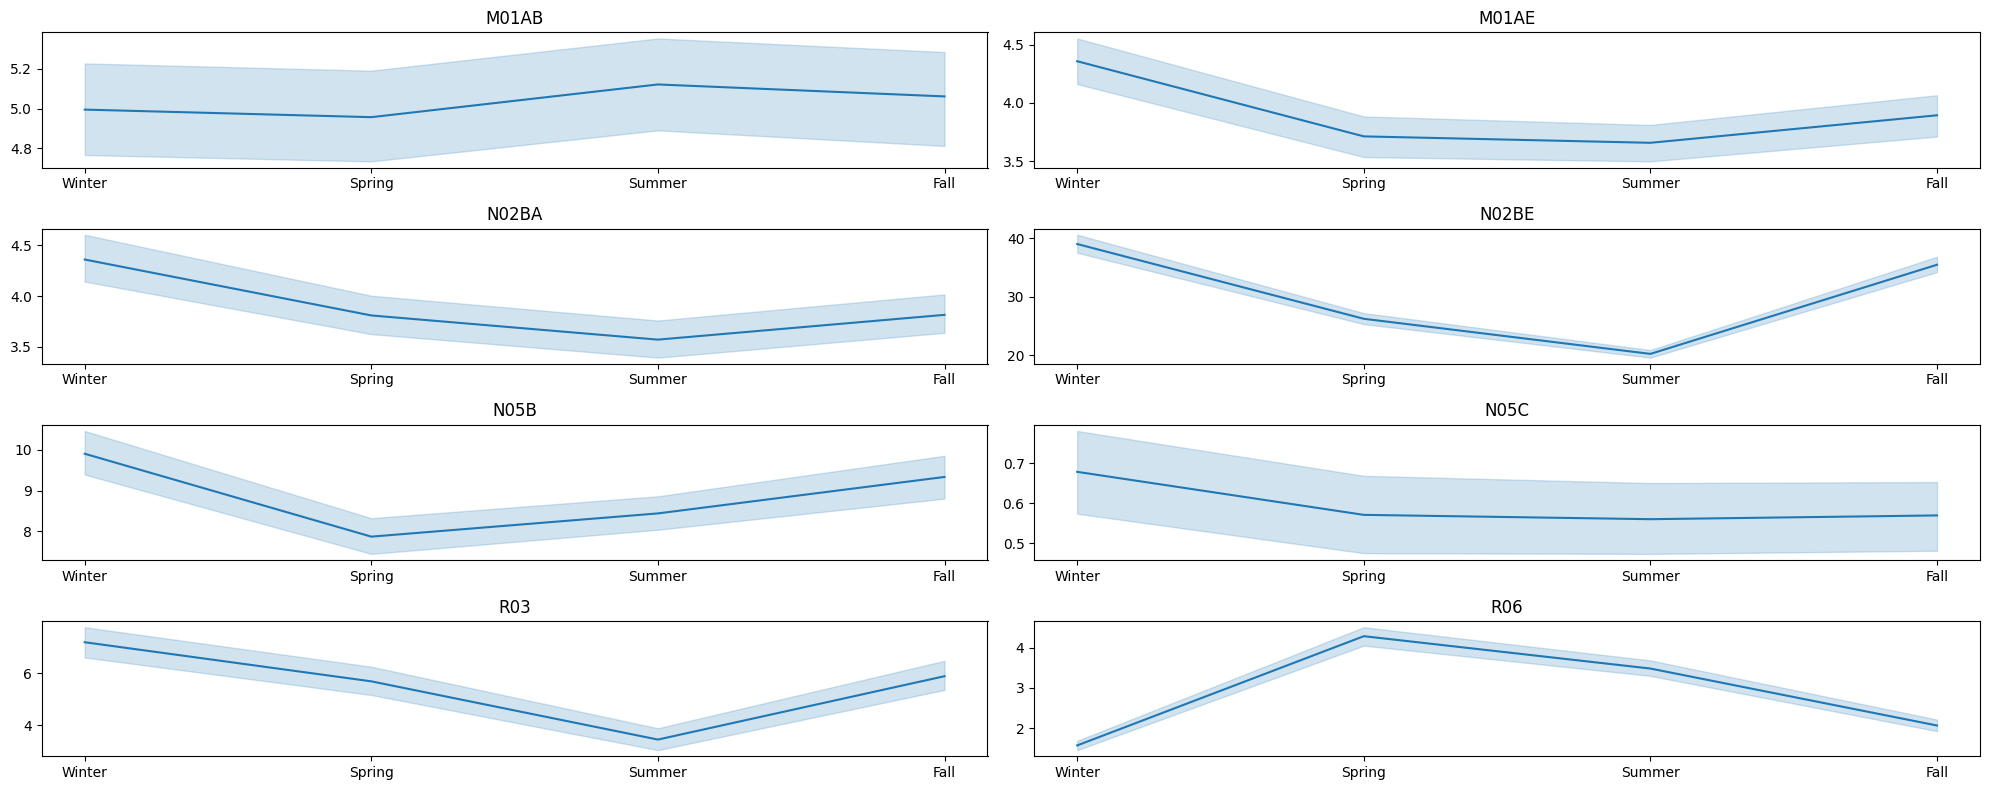

In [260]:
plot(data, columns, 'Season')

In [261]:
data = pd.get_dummies(data=data, columns=['Season'])


In [262]:
data = data.drop(columns=['Hour'])

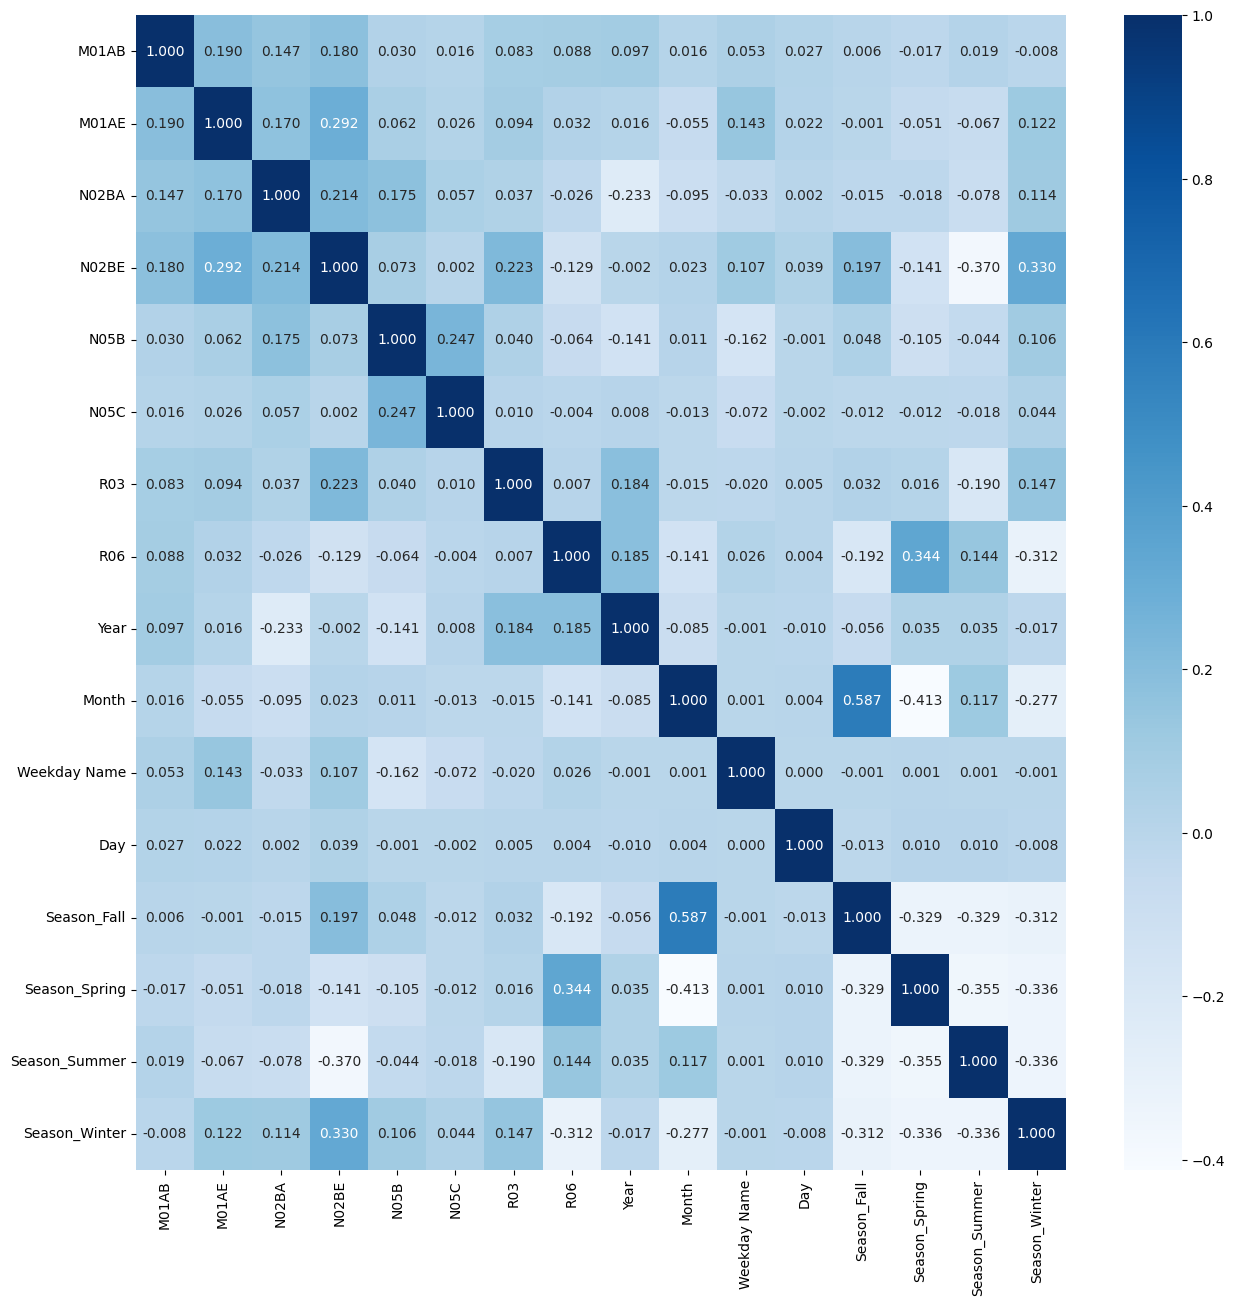

In [263]:
df_corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [264]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (1474, 16) 
Validation size :  (421, 16) 
Test Size :  (211, 16)


M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
datum                                                                        
2014-01-02   0.00  3.670    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
2014-01-03   8.00  4.000    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2014-01-04   2.00  1.000    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
2014-01-05   4.00  3.000    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
2014-01-06   5.00  1.000    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   
...           ...    ...    ...    ...   ...   ...   ...  ...   ...    ...   
2018-01-10   9.33  7.406    6.0  44.50  12.0   0.0   6.0  2.0  2018      1   
2018-01-11   4.00  4.330    5.5  37.60   7.0   0.0   5.0  0.0  2018      1   
2018-01-12   5.66  1.330    3.0  42.00  11.0   0.0  10.0  0.0  2018      1   
2018-01-13   3.50  3.495    3.2  32.00   6.0   0.0   8.0  1.0  2018      1   
2018-01-14   4.33  5.155    1.2  36.00   2.0   0.0   5.0  1.0  2018      1   

            Weekday Name  Day  Season_Fall  Season_Spring  Season_Summer  \
datum                                                                      
2014-01-02             3    2        False          False          False   
2014-01-03             4    3        False          False          False   
2014-01-04             5    4        False          False          False   
2014-01-05             6    5        False          False          False   
2014-01-06             0    6        False          False          False   
...                  ...  ...          ...            ...            ...   
2018-01-10             2   10        False          False          False   
2018-01-11             3   11        False          False          False   
2018-01-12             4   12        False          False          False   
2018-01-13             5   13        False          False          False   
2018-01-14             6   14        False          False          False   

            Season_Winter  
datum                      
2014-01-02           True  
2014-01-03           True  
2014-01-04           True  
2014-01-05           True  
2014-01-06           True  
...                   ...  
2018-01-10           True  
2018-01-11           True  
2018-01-12           True  
2018-01-13           True  
2018-01-14           True  

[1474 rows x 16 columns]

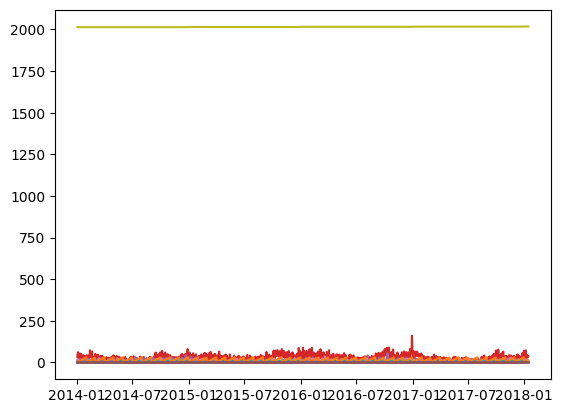

In [265]:
plt.plot(train_df)

In [266]:
train_df.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Weekday Name', 'Day', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

Normalizacija podataka

In [314]:
scaler = MinMaxScaler()

col = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Weekday Name', 'Day', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [315]:
target = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [316]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 11, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 11, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 11, 1)

In [289]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (1463, 11, 16) (1463, 8) 
 Val size :  (410, 11, 16) (410, 8) 
 Test Size :  (200, 11, 16) (1463, 8)


pomocne funkcije

In [271]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [312]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    fig, axs = plt.subplots(4, 2, figsize=(12, 12)) 

    for k in range(0,8):
        i = k // 2 
        j = k % 2   
        
        axs[i, j].plot(y_test[:, k], label='True')   
        axs[i, j].plot(y_pred[:, k], label='Predicted') 
        axs[i, j].set_xlabel(data.columns[k])  
        axs[i, j].legend()  

    plt.tight_layout()  
    plt.show()


    display(results)



In [273]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


Modeli


In [274]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# SimpleRNN

Epoch 1/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.1592 - root_mean_squared_error: 0.2033 - val_loss: 0.0255 - val_mean_absolute_error: 0.1149 - val_root_mean_squared_error: 0.1596
Epoch 2/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.1052 - root_mean_squared_error: 0.1376 - val_loss: 0.0248 - val_mean_absolute_error: 0.1135 - val_root_mean_squared_error: 0.1576
Epoch 3/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.1056 - root_mean_squared_error: 0.1397 - val_loss: 0.0246 - val_mean_absolute_error: 0.1126 - val_root_mean_squared_error: 0.1568
Epoch 4/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.1040 - root_mean_squared_error: 0.1371 - val_loss: 0.0245 - val_mean_absolute_error: 0.1124 - val_root_mean_squared_error: 0.1564
Epoch 5/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.1040 - 

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_52 (SimpleRNN)       │ (None, 11, 50)         │         3,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_53 (SimpleRNN)       │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_54 (SimpleRNN)       │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_55 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,818 (147.73 KB)

 Trainable params: 18,908 (73.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,910 (73.87 KB)

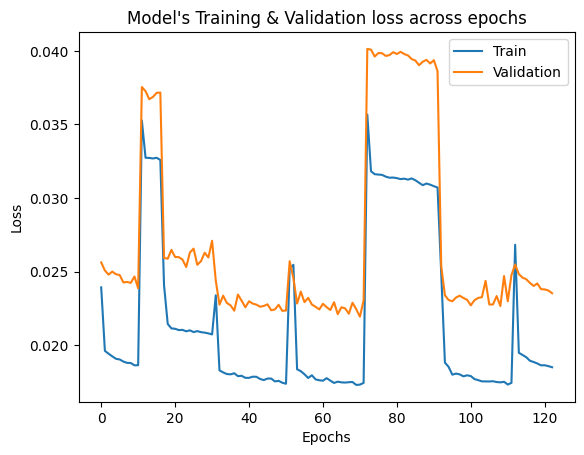

In [313]:

model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = 8, activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 11, batch_size = 1,
                    callbacks=[ history]
                    )
model.summary()
plotloss(history)


In [291]:
model.evaluate(X_test,Y_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.1057 - root_mean_squared_error: 0.1500 


[0.02058400772511959, 0.1013634130358696, 0.14259371161460876]

In [311]:
print_result(model, 'SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squared_error', X_test, Y_test, 200)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step


ValueError: operands could not be broadcast together with shapes (200,8) (16,) (200,8) 

# LSTM

LSTM 50 50 D25, 8

In [321]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(50, return_sequences = False))
regressorLSTM.add(Dense(25, activation="relu"))
regressorLSTM.add(Dense(8,activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=60,batch_size=32, callbacks=[history])
regressorLSTM.summary()


Epoch 1/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.9906 - mean_absolute_error: 0.7759 - mean_squared_error: 0.9906 - val_loss: 1.1526 - val_mean_absolute_error: 0.8047 - val_mean_squared_error: 1.1552
Epoch 2/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9202 - mean_absolute_error: 0.7565 - mean_squared_error: 0.9202 - val_loss: 1.1680 - val_mean_absolute_error: 0.8091 - val_mean_squared_error: 1.1706
Epoch 3/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9146 - mean_absolute_error: 0.7472 - mean_squared_error: 0.9146 - val_loss: 1.1497 - val_mean_absolute_error: 0.8063 - val_mean_squared_error: 1.1524
Epoch 4/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9049 - mean_absolute_error: 0.7443 - mean_squared_error: 0.9049 - val_loss: 1.1410 - val_mean_absolute_error: 0.8023 - val_mean_squared_error: 1.1436
Epoch 5/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9318 - mean_absolute_error: 0.7543 - mean_squared_error: 0.9318 - val_loss: 1.1463 - val_mean_ab

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 11, 50)         │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 8)              │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,251 (411.14 KB)

 Trainable params: 35,083 (137.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,168 (274.10 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2629 - mean_absolute_error: 0.8303 - mean_squared_error: 1.2608


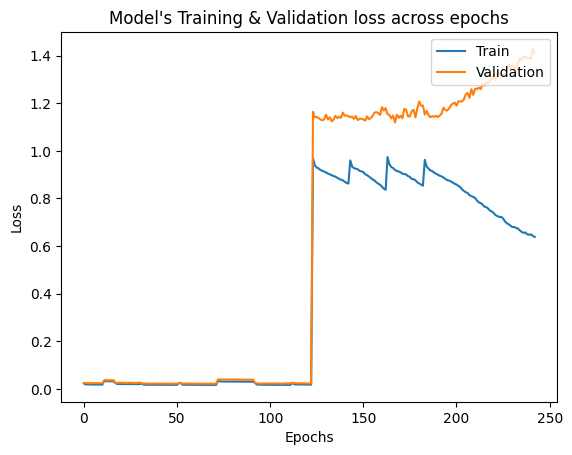

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


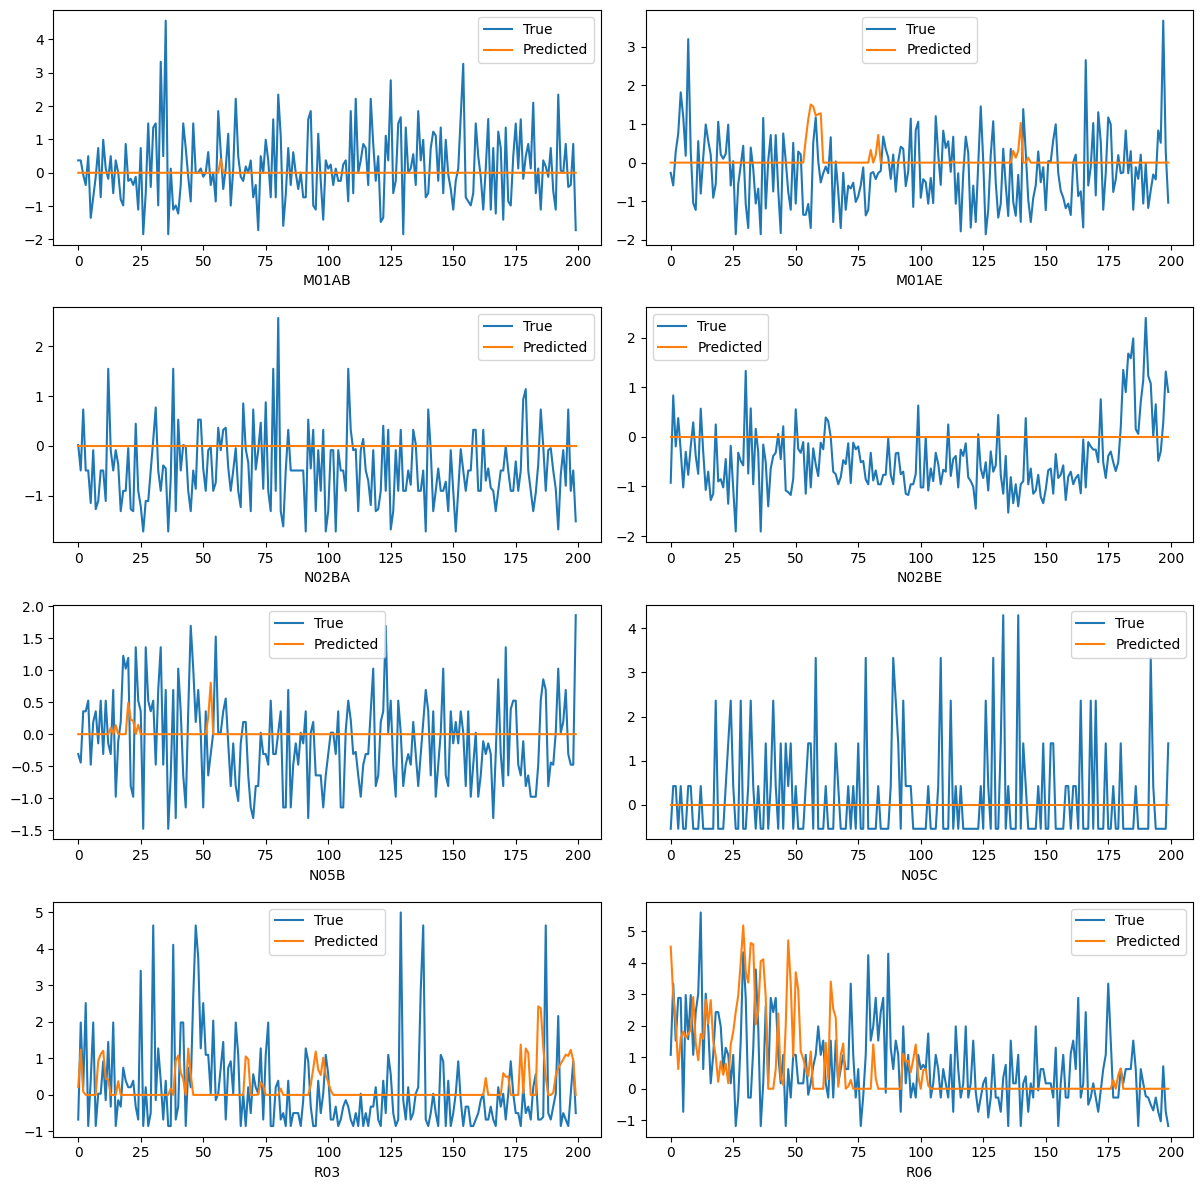

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.119854 -0.766866   
2  GRU L 4 units 50, Adam 0.001, LOSS mean_square...  0.102401 -0.161407   
3  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
4  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.102052 -0.153137   
5  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.128567 -0.614784   
6  4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_sq...  0.111117 -0.476567   
7  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.111117 -0.476567   
8  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.771024 -0.118745   
9  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.806021 -0.230524   

   mean sqrd  
0   0.020333  
1   0.026648  
2   0.019838  
3   0.020333  
4   0.020758  
5   0.035688  
6   0.023819  
7   0.023819  
8   1.013988  
9   1.166294

In [322]:

result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, 'LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


LSTM 32,16 D8

In [303]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(16, return_sequences = False))
regressorLSTM.add(Dense(8,activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=20,batch_size=32, callbacks=[history])
regressorLSTM.summary()


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0408 - mean_absolute_error: 0.1451 - mean_squared_error: 0.0408 - val_loss: 0.0401 - val_mean_absolute_error: 0.1355 - val_mean_squared_error: 0.0403
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0323 - mean_absolute_error: 0.1236 - mean_squared_error: 0.0323 - val_loss: 0.0401 - val_mean_absolute_error: 0.1361 - val_mean_squared_error: 0.0402
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0312 - mean_absolute_error: 0.1216 - mean_squared_error: 0.0312 - val_loss: 0.0396 - val_mean_absolute_error: 0.1348 - val_mean_squared_error: 0.0398
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0308 - mean_absolute_error: 0.1205 - mean_squared_error: 0.0308 - val_loss: 0.0399 - val_mean_absolute_error: 0.1354 - val_mean_squared_error: 0.0400
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 - mean_absolute_error: 0.1212 - mean_squared_error: 0.0314 - val_loss: 0.0398 - val_mean_abs

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 11, 32)         │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,634 (111.86 KB)

 Trainable params: 9,544 (37.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,090 (74.57 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0375 - mean_absolute_error: 0.1334 - mean_squared_error: 0.0375  


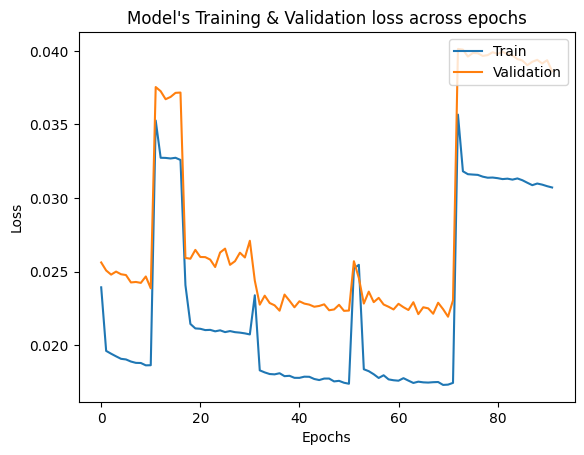

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


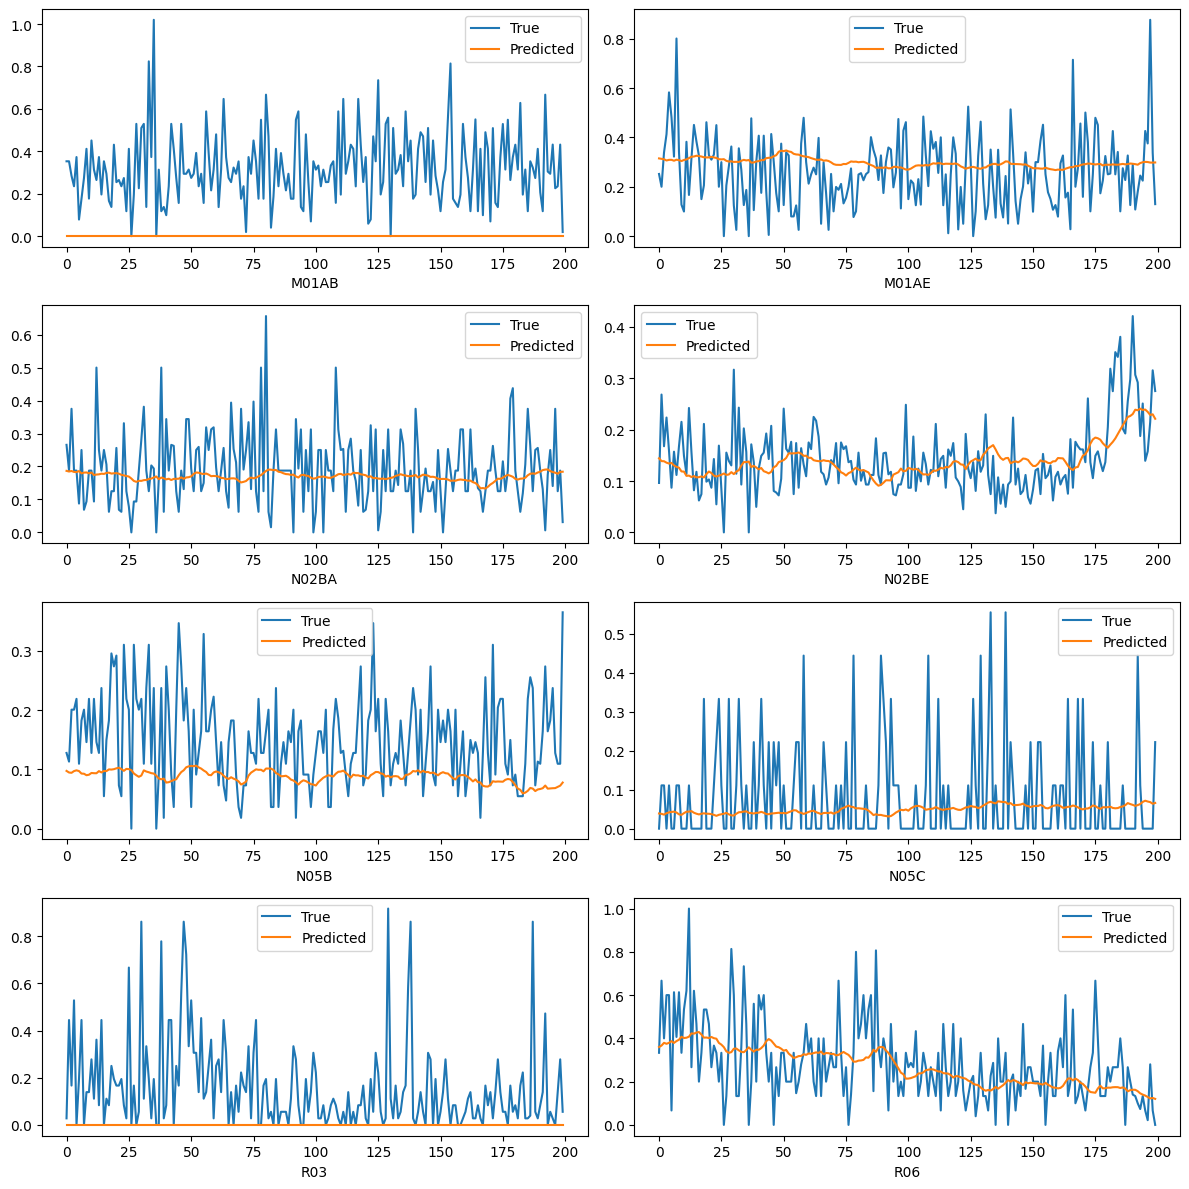

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.119854 -0.766866   
2  GRU L 4 units 50, Adam 0.001, LOSS mean_square...  0.102401 -0.161407   
3  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
4  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.102052 -0.153137   
5  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.128567 -0.614784   

   mean sqrd  
0   0.020333  
1   0.026648  
2   0.019838  
3   0.020333  
4   0.020758  
5   0.035688

In [304]:
result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, 'LSTM 32, 16, ,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


LSTM 50 D0.2, LSTM 3x50

In [320]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
# regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=8,activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=20,batch_size=32, callbacks=[history])
regressorLSTM.summary()

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 1.0376 - mean_absolute_error: 0.7854 - val_loss: 1.1535 - val_mean_absolute_error: 0.8031
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.9702 - mean_absolute_error: 0.7660 - val_loss: 1.1514 - val_mean_absolute_error: 0.8016
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9186 - mean_absolute_error: 0.7523 - val_loss: 1.1360 - val_mean_absolute_error: 0.8001
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9374 - mean_absolute_error: 0.7589 - val_loss: 1.1482 - val_mean_absolute_error: 0.8007
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9305 - mean_absolute_error: 0.7535 - val_loss: 1.1188 - val_mean_absolute_error: 0.7985
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.9414 - mean_absolute_error: 0.7597 - val_loss: 1.1518 - val_mean_absolute_error: 0.8033
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9157 - mean_absolute_error: 0.7549 - val_loss

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                  │ (None, 11, 50)         │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 11, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 11, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,226 (871.98 KB)

 Trainable params: 74,408 (290.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148,818 (581.32 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0256 - mean_absolute_error: 0.1160


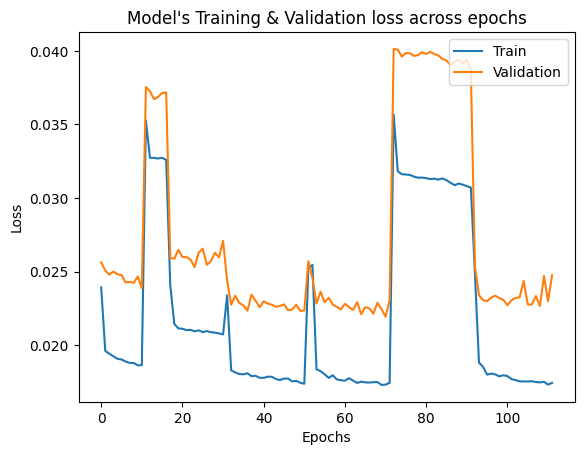

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


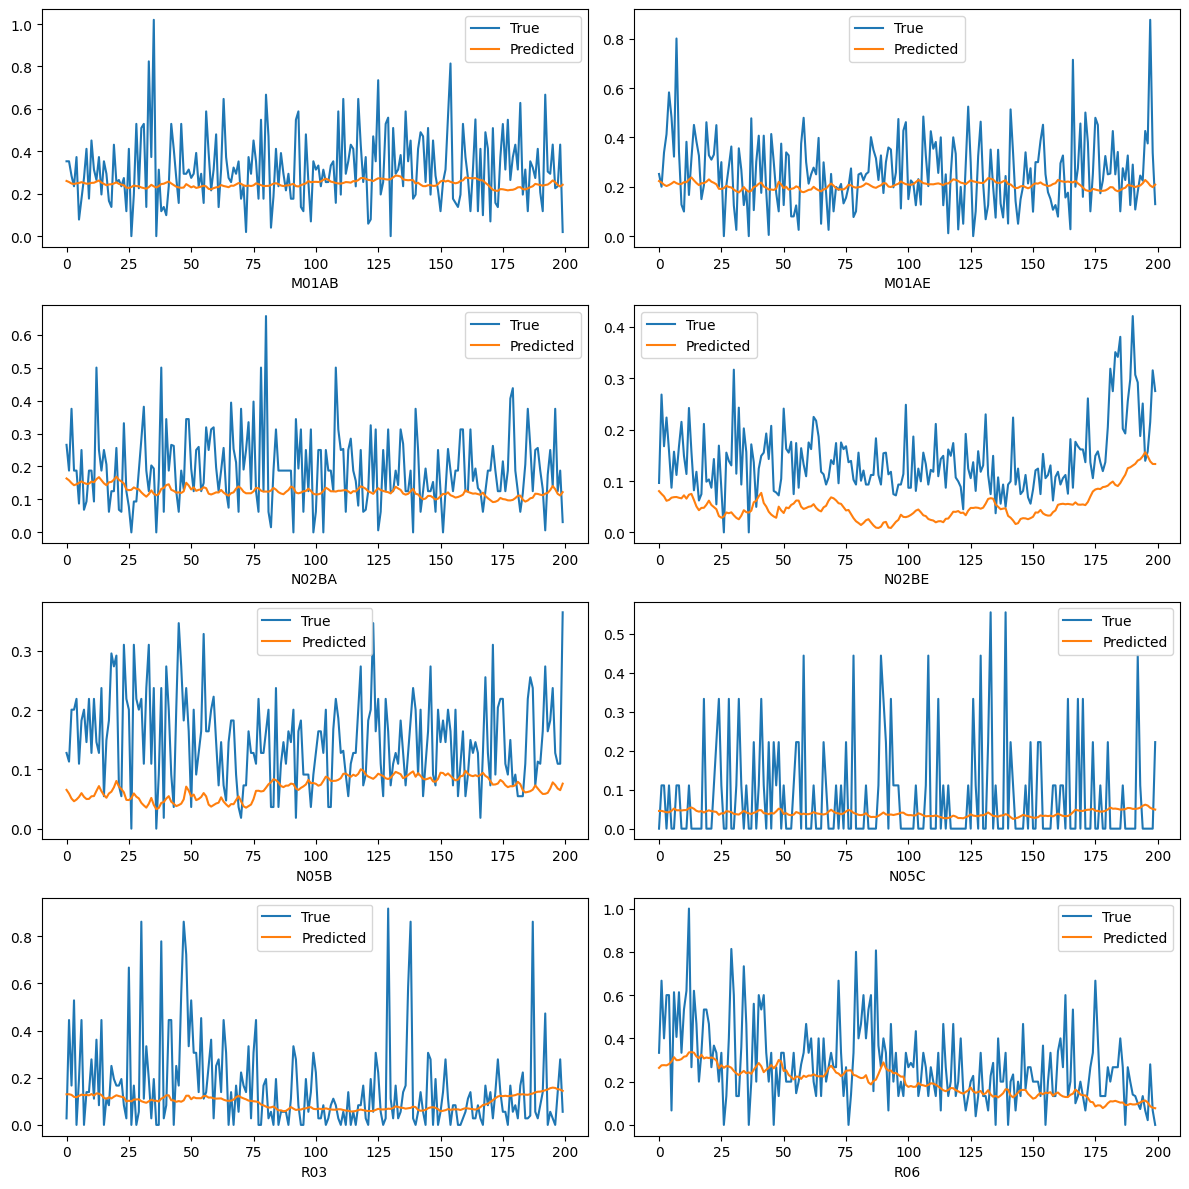

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.119854 -0.766866   
2  GRU L 4 units 50, Adam 0.001, LOSS mean_square...  0.102401 -0.161407   
3  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
4  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.102052 -0.153137   
5  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.128567 -0.614784   
6  4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_sq...  0.111117 -0.476567   

   mean sqrd  
0   0.020333  
1   0.026648  
2   0.019838  
3   0.020333  
4   0.020758  
5   0.035688  
6   0.023819

In [306]:
result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, '4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


# GRU

In [319]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
# regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=8,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=20,batch_size=32, callbacks=[history])
regressorGRU.summary()


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.9549 - mean_absolute_error: 0.7626 - val_loss: 1.1403 - val_mean_absolute_error: 0.8065
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.9317 - mean_absolute_error: 0.7583 - val_loss: 1.1439 - val_mean_absolute_error: 0.8011
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.8979 - mean_absolute_error: 0.7459 - val_loss: 1.1343 - val_mean_absolute_error: 0.8036
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9467 - mean_absolute_error: 0.7623 - val_loss: 1.1461 - val_mean_absolute_error: 0.8130
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9152 - mean_absolute_error: 0.7538 - val_loss: 1.1289 - val_mean_absolute_error: 0.8037
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9252 - mean_absolute_error: 0.7568 - val_loss: 1.1347 - val_mean_absolute_error: 0.8048
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.9125 - mean_absolute_error: 0.7528 - val_los

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                    │ (None, 11, 50)         │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_17 (GRU)                    │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_18 (GRU)                    │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_19 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,526 (662.21 KB)

 Trainable params: 56,508 (220.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,018 (441.48 KB)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0216 - mean_absolute_error: 0.1077

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0209 - mean_absolute_error: 0.1051


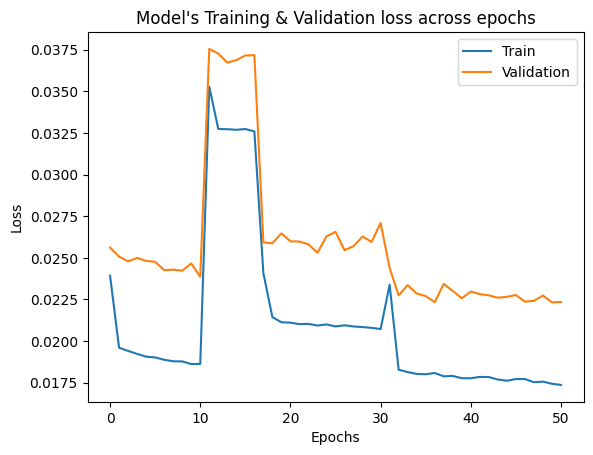

In [282]:

result = regressorGRU.evaluate(X_test,Y_test)
plotloss(history)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


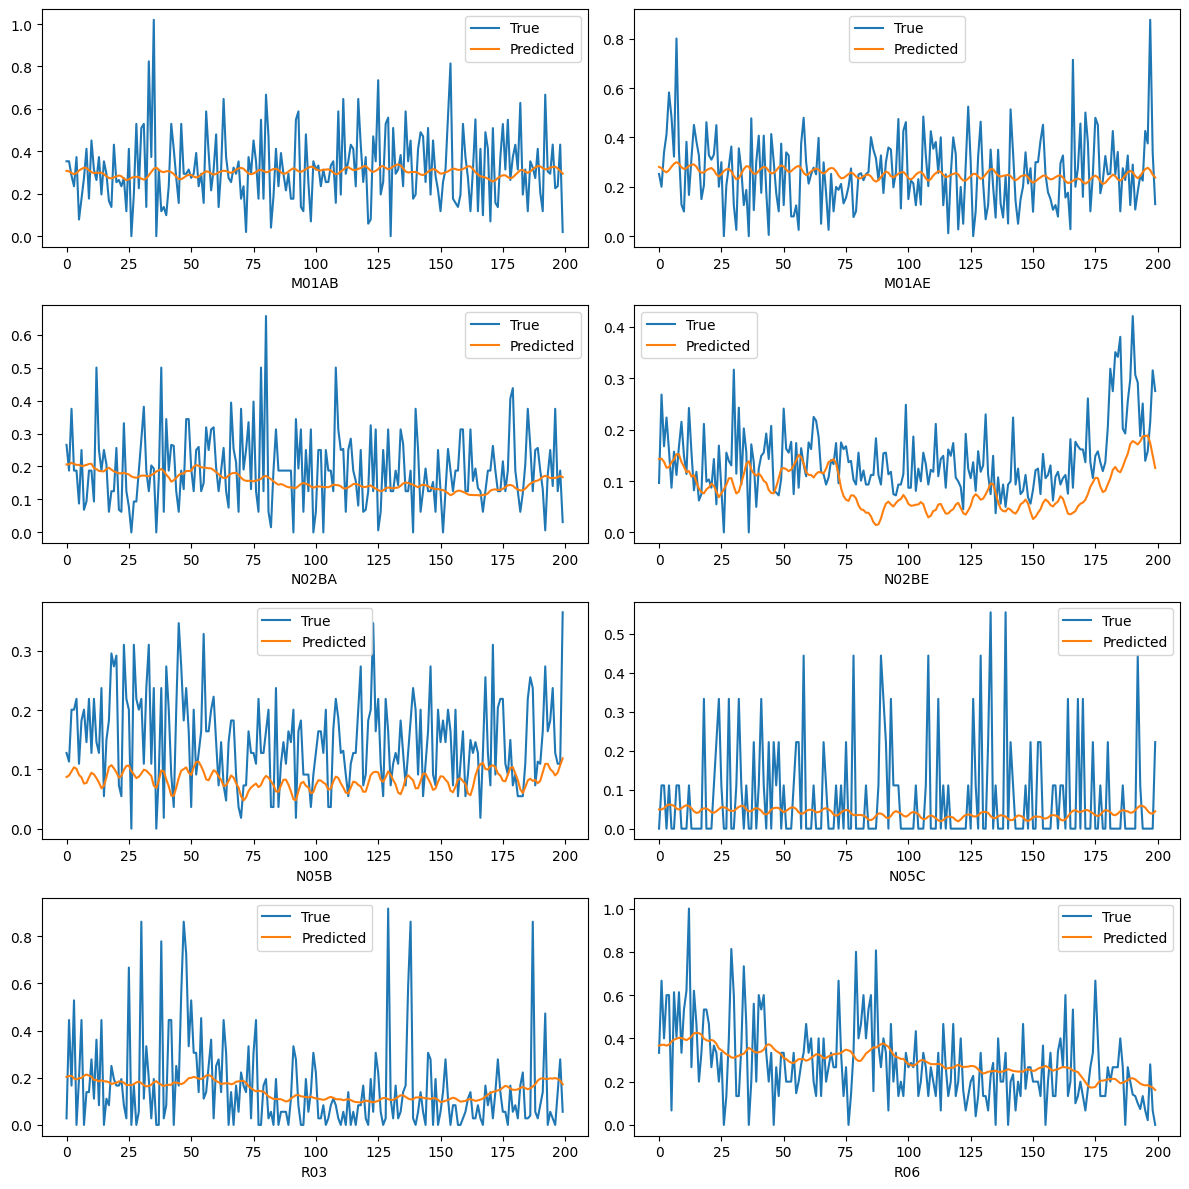

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.119854 -0.766866   
2  GRU L 4 units 50, Adam 0.001, LOSS mean_square...  0.102401 -0.161407   

   mean sqrd  
0   0.020333  
1   0.026648  
2   0.019838

In [283]:

print_result(regressorGRU, 'GRU L 4 units 50, Adam 0.001, LOSS mean_squared_error', X_test, Y_test)

In [284]:
# optimizer=tf.optimizers.Adamax(learning_rate=0.001),
# metrics=[tf.metrics.RootMeanSquaredError()]

# Result

In [307]:
results

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.119854 -0.766866   
2  GRU L 4 units 50, Adam 0.001, LOSS mean_square...  0.102401 -0.161407   
3  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.101363 -0.025981   
4  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.102052 -0.153137   
5  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.128567 -0.614784   
6  4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_sq...  0.111117 -0.476567   

   mean sqrd  
0   0.020333  
1   0.026648  
2   0.019838  
3   0.020333  
4   0.020758  
5   0.035688  
6   0.023819